In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns',None)

In [4]:
data = pd.read_csv('Black Friday Dataset.csv')

In [6]:
data.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
data.shape

(550068, 12)

In [10]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [11]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [13]:
data['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [15]:
categorical_feature = [feature for feature in data.columns if data[feature].dtypes =='O']

In [16]:
categorical_feature

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [18]:
for feature in categorical_feature :
    print("the feature name {} number of categories are {} ".format(feature,len(data[feature].unique())))

the feature name Product_ID number of categories are 3631 
the feature name Gender number of categories are 2 
the feature name Age number of categories are 7 
the feature name City_Category number of categories are 3 
the feature name Stay_In_Current_City_Years number of categories are 5 


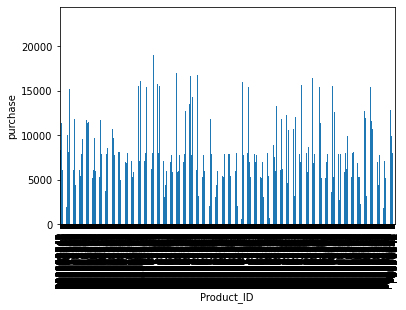

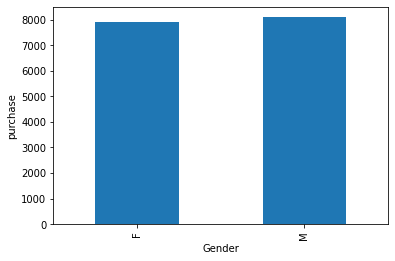

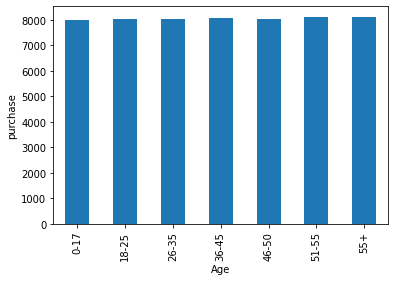

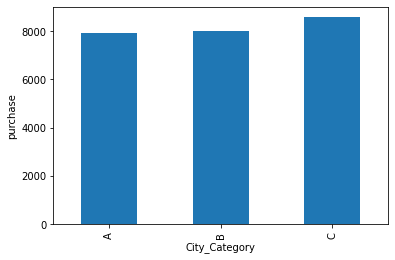

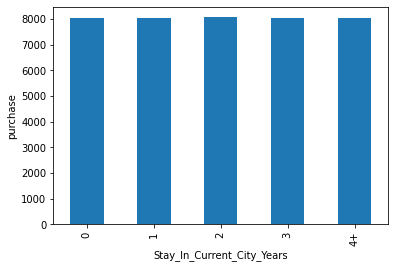

In [20]:
df = data.copy()
for feature in categorical_feature :
    df.groupby(feature)['Purchase'].median().plot.bar()
    plt.ylabel('purchase')
    plt.xlabel(feature)
    plt.show()

In [21]:
numerical_feature = [feature for feature in data.columns if data[feature].dtypes !='O' ]

In [22]:
numerical_feature 

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [24]:
discrete_features  = [feature for feature in numerical_feature if len(data[feature].unique())<=25]

In [25]:
discrete_features

['Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [30]:
continious_feature = [feature for feature in numerical_feature if feature not in discrete_features]

In [31]:
continious_feature

['User_ID', 'Purchase']

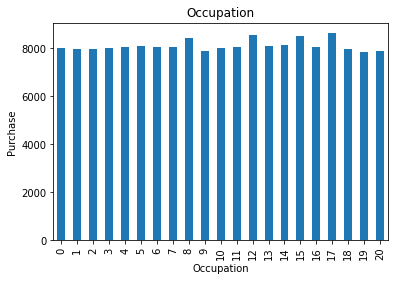

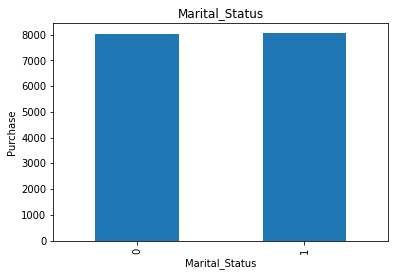

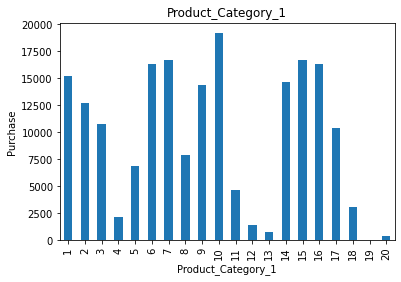

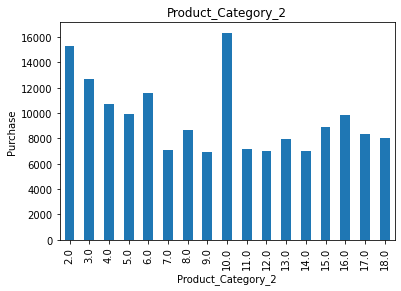

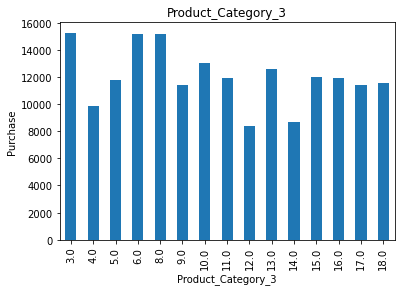

In [32]:
df= data.copy()
for feature in discrete_features :
    df.groupby(feature)['Purchase'].median().plot.bar()
    plt.ylabel('Purchase')
    plt.title(feature)
    plt.show()

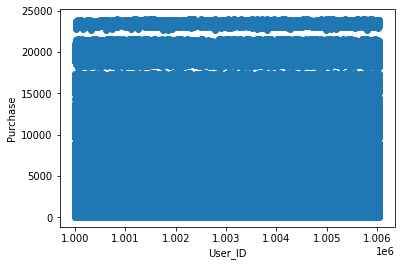

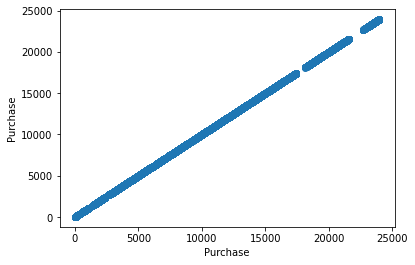

In [36]:
df= data.copy()
for feature in continious_feature:
    plt.scatter(data[feature],data['Purchase'])
    plt.xlabel(feature)
    plt.ylabel('Purchase')
    plt.show()